Walmart wants to open a chain of stores across Florida and wants to find out optimal store location 
 to maximize revenue
Demostrate K-means Clustering by establishing walmart store across Florida in the most optimized way

In [29]:
# Enable inline plotting for Jupyter
%matplotlib inline

# --- Import libraries ---
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.cluster import KMeans

# --- Generate synthetic data ---
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# --- Define number of clusters ---
n_clusters = 4

%matplotlib inline: Configures Jupyter to display plots within the notebook.

import matplotlib.pyplot as plt: Imports Matplotlib for plotting.

import seaborn as sns; sns.set(): Imports Seaborn for enhanced plot styling and applies defaults.

import numpy as np: Imports NumPy for numerical operations.

from sklearn.datasets import make_blobs: Imports make_blobs to generate synthetic clustering data.

from sklearn.metrics.pairwise import pairwise_distances_argmin: Imports the function to find the 
nearest cluster center for each point.

from sklearn.cluster import KMeans: Imports the KMeans class from scikit-learn.
X, y_true = make_blobs(...): Generates a dataset (X) of 300 points in 4 clusters, along with the 

true cluster labels (y_true).

n_clusters = 4: Sets the number of clusters for K-Means to 4.

In [30]:

# --- Custom K-Means Function with Convergence ---
def find_clusters(X, n_clusters):
    # Randomly initialize centers
    centers = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        # 4. Check for convergence
        if np.all(centers == new_centers):
            break  # Exit the loop if centers don't change

        centers = new_centers  # Update centers for the next iteration

    return centers, labels



def find_clusters(X, n_clusters):: Defines a function to perform K-Means clustering.

centers = X[np.random.choice(X.shape[0], n_clusters, replace=False)]: Randomly initializes cluster centers by selecting data points.

while True:: Starts an infinite loop that continues until convergence.

    labels = pairwise_distances_argmin(X, centers): Assigns each data point to the nearest cluster center.

new_centers = np.array([...]): Calculates new cluster centers as the mean of the data points in each cluster.

if np.all(centers == new_centers):: Checks if the cluster centers have changed.

    break: Exits the loop if the centers have converged.

    centers = new_centers: Updates the cluster centers for the next iteration.

return centers, labels: Returns the final cluster centers and labels.

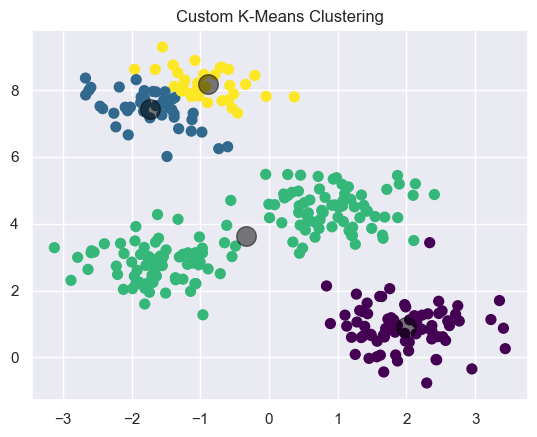

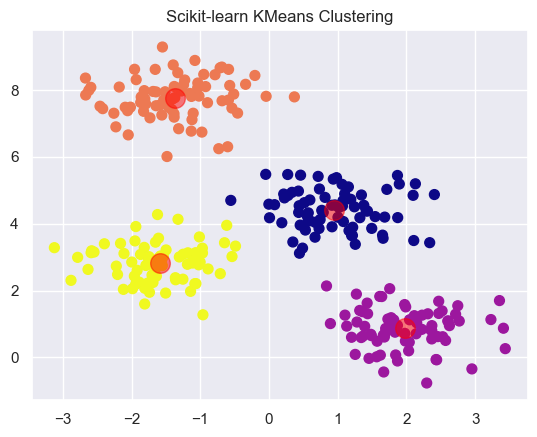

In [31]:
# --- Run the custom K-Means ---
centers, labels = find_clusters(X, n_clusters)

# --- Plot the custom K-Means result ---
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("Custom K-Means Clustering")
plt.show()

# --- Scikit-learn KMeans ---
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans.fit(X)
centers_sklearn = kmeans.cluster_centers_
labels_sklearn = kmeans.labels_

# --- Plot scikit-learn's result ---
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, s=50, cmap='plasma')
plt.scatter(centers_sklearn[:, 0], centers_sklearn[:, 1], c='red', s=200, alpha=0.5)
plt.title("Scikit-learn KMeans Clustering")
plt.show()


centers, labels = find_clusters(X, n_clusters): Runs your custom K-Means function to get cluster centers and labels.

plt.scatter(...): Plots the data points, colored by cluster labels from your custom K-Means.

plt.scatter(...): Plots the cluster centers from your custom K-Means.

plt.title(...): Sets the plot title.

    plt.show(): Displays the plot.
kmeans = KMeans(...): Initializes scikit-learn's K-Means model.

kmeans.fit(X): Fits the K-Means model to the data.

    centers_sklearn = kmeans.cluster_centers_: Gets the cluster centers from scikit-learn's K-Means.

labels_sklearn = kmeans.labels_: Gets the cluster labels from scikit-learn's K-Means.

plt.scatter(...): Plots the data points, colored by cluster labels from scikit-learn's K-Means.

plt.scatter(...): Plots the cluster centers from scikit-learn's K-Means.

plt.title(...): Sets the plot title.

    plt.show(): Displays the plot.